In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DataFolderPath="C:/Users/Clevo/Desktop/Power Consumption Prediction-Micev-Zhang/0 Data"
DataFileName="building61duringoffice.csv"
DataFile=DataFolderPath+'/'+ DataFileName
DF_data=pd.read_csv(DataFile,sep=",",index_col=0) 
DF_data

,OAT,Building 6 kW
Date,,
1/1/2010 0:00,29.420300,24.00
1/1/2010 1:00,29.910495,29.70
1/1/2010 2:00,30.216893,31.40
1/1/2010 3:00,30.217575,35.70
1/1/2010 4:00,29.607685,35.90
1/1/2010 5:00,28.744257,36.10
1/1/2010 6:00,28.552293,31.70
1/1/2010 7:00,25.234590,34.10
1/1/2010 8:00,25.380340,35.80


In [4]:
DF_data.head()
DF_data.index=pd.to_datetime(DF_data.index)

In [5]:
def lag_column(df, column_name, lag_period=1):
    for i in range(4,lag_period+1,1):
        new_column_name=column_name+"-"+str(i*15)+"min"
        df[new_column_name]=df[column_name].shift(i)
    return df

In [6]:
DF_lagged=DF_data.copy()
DF_lagged=lag_column(DF_data,"OAT",24)
DF_lagged.dropna(inplace=True)
DF_lagged.corr()

,OAT,Building 6 kW,OAT-60min,OAT-75min,OAT-90min,OAT-105min,OAT-120min,OAT-135min,OAT-150min,OAT-165min,...,OAT-225min,OAT-240min,OAT-255min,OAT-270min,OAT-285min,OAT-300min,OAT-315min,OAT-330min,OAT-345min,OAT-360min
OAT,1.000000,0.035004,0.892251,0.847392,0.801131,0.756062,0.714716,0.679271,0.651748,0.633856,...,0.668298,0.699585,0.736460,0.776561,0.817453,0.856511,0.891111,0.918458,0.935906,0.941039
Building 6 kW,0.035004,1.000000,-0.202789,-0.259049,-0.306454,-0.342658,-0.365735,-0.373335,-0.363454,-0.335987,...,-0.113124,-0.052902,0.001771,0.048239,0.083939,0.107503,0.116696,0.109724,0.085825,0.045087
OAT-60min,0.892251,-0.202789,1.000000,0.990189,0.966525,0.932883,0.892066,0.847152,0.800834,0.755709,...,0.633240,0.625987,0.629602,0.643796,0.667477,0.698832,0.735802,0.776000,0.816978,0.856103
OAT-75min,0.847392,-0.259049,0.990189,1.000000,0.990186,0.966511,0.932861,0.892036,0.847106,0.800770,...,0.651065,0.633069,0.625806,0.629426,0.643631,0.667327,0.698699,0.735690,0.775898,0.816886
OAT-90min,0.801131,-0.306454,0.966525,0.990186,1.000000,0.990181,0.966500,0.932843,0.892005,0.847060,...,0.678565,0.650923,0.632916,0.625654,0.629279,0.643494,0.667202,0.698592,0.735592,0.775809
OAT-105min,0.756062,-0.342658,0.932883,0.966511,0.990181,1.000000,0.990179,0.966496,0.932830,0.891981,...,0.714043,0.678467,0.650814,0.632801,0.625541,0.629170,0.643393,0.667115,0.698511,0.735518
OAT-120min,0.714716,-0.365735,0.892066,0.932861,0.966500,0.990179,1.000000,0.990177,0.966489,0.932816,...,0.755442,0.713970,0.678384,0.650725,0.632709,0.625449,0.629082,0.643314,0.667041,0.698443
OAT-135min,0.679271,-0.373335,0.847152,0.892036,0.932843,0.966496,0.990177,1.000000,0.990176,0.966484,...,0.800592,0.755403,0.713924,0.678331,0.650666,0.632647,0.625386,0.629025,0.643259,0.666990
OAT-150min,0.651748,-0.363454,0.800834,0.847106,0.892005,0.932830,0.966489,0.990176,1.000000,0.990175,...,0.846951,0.800565,0.755370,0.713883,0.678282,0.650611,0.632589,0.625332,0.628972,0.643209
OAT-165min,0.633856,-0.335987,0.755709,0.800770,0.847060,0.891981,0.932816,0.966484,0.990175,1.000000,...,0.891914,0.846933,0.800541,0.755338,0.713841,0.678232,0.650556,0.632537,0.625279,0.628920


In [7]:
def normalize(df):
    return (df-df.min())/(df.max()-df.min())
DF_Final=pd.read_csv(DataFile,sep=",",index_col=0) 
DF_Final.index=pd.to_datetime(DF_Final.index)
DF_Final["hour"]=DF_Final.index.hour
DF_Final["day of week"]=DF_Final.index.dayofweek #from 0-Monday to 6- Sunday
DF_Final["month"]=DF_Final.index.month #month 
DF_Final["week of year"]=DF_Final.index.week
DF_Final.head()

,OAT,Building 6 kW,hour,day of week,month,week of year
Date,,,,,,
2010-01-01 00:00:00,29.420300,24.0,0,4,1,53
2010-01-01 01:00:00,29.910495,29.7,1,4,1,53
2010-01-01 02:00:00,30.216893,31.4,2,4,1,53
2010-01-01 03:00:00,30.217575,35.7,3,4,1,53
2010-01-01 04:00:00,29.607685,35.9,4,4,1,53


In [8]:
def weekendDetector(day):
    weekendLabel=0
    if (day==5 or day ==6):
        weekendLabel=1
    return weekendLabel
def dayDetector(hour):
    dayLabel=0
    if (hour<21 and hour>8):
        dayLabel=1
    return dayLabel
def SummSpringDetector(month): #There is a difference in power consumption in summer and in winter !!!! 
    monthDetector=0
    if(month>3 and month<10):
        monthDetector=1
    return monthDetector

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #taking state hollidays in USA in period of 01.01.2010 - 31.12.2010
dr = pd.date_range(start='2010-01-01', end='2010-12-31')
df = pd.DataFrame()
df['Date'] = dr
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
holiday=["2010-01-01","2010-01-18","2010-02-15","2010-05-31","2010-07-05","2010-09-06","2010-10-11","2010-11-11","2010-11-25","2010-12-24","2010-12-31"]  

In [10]:
DF_Final["weekend or weekday"]=[weekendDetector(day) for day in DF_Final["day of week"]]
DF_Final["day or night"]=[dayDetector(hour) for hour in DF_Final["hour"]]
DF_Final["summer or winter"]=[SummSpringDetector(month) for month in DF_Final["month"]]

In [11]:
for day in holiday:
    DF_Final["weekend or weekday"][day]=1
DF_Final["2010-11-25"]
DF_Final_Lagged=DF_Final
DF_Final_Lagged=lag_column(DF_Final_Lagged,"OAT",28) #taking values of temperatures for previous 7 hours in a range of 15 min as a different columns
DF_Final_Lagged=lag_column(DF_Final_Lagged,"Building 6 kW",96) #taking values of power consumption from previous 24 hours in a range of 15 min and put them in different columns
DF_Final_Lagged.head(96)
DF_Final_Lagged.dropna(inplace=True)
DF_target=DF_Final_Lagged["Building 6 kW"] #target values 
DF_features=DF_Final_Lagged.drop("Building 6 kW",axis=1) #values that should be used for building a model that should predict value of power consumption
DF_Final_Lagged_norm=normalize(DF_Final_Lagged) #normalized values of values 
DF_target_norm=DF_Final_Lagged_norm["Building 6 kW"] 
DF_features_norm=DF_Final_Lagged_norm.drop("Building 6 kW",axis=1)
DF_features_norm

C:\Users\Clevo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,OAT,hour,day of week,month,week of year,weekend or weekday,day or night,summer or winter,OAT-60min,OAT-75min,...,Building 6 kW-1305min,Building 6 kW-1320min,Building 6 kW-1335min,Building 6 kW-1350min,Building 6 kW-1365min,Building 6 kW-1380min,Building 6 kW-1395min,Building 6 kW-1410min,Building 6 kW-1425min,Building 6 kW-1440min
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05 00:00:00,0.325319,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.319445,0.322343,...,0.261593,0.325803,0.305589,0.277051,0.329370,0.326992,0.324614,0.273484,0.253270,0.185493
2010-01-05 01:00:00,0.327336,0.043478,0.166667,0.0,0.0,0.0,0.0,0.0,0.321361,0.319445,...,0.237812,0.261593,0.325803,0.305589,0.277051,0.329370,0.326992,0.324614,0.273484,0.253270
2010-01-05 02:00:00,0.323711,0.086957,0.166667,0.0,0.0,0.0,0.0,0.0,0.326749,0.321361,...,0.205707,0.237812,0.261593,0.325803,0.305589,0.277051,0.329370,0.326992,0.324614,0.273484
2010-01-05 03:00:00,0.324185,0.130435,0.166667,0.0,0.0,0.0,0.0,0.0,0.324803,0.326749,...,0.221165,0.205707,0.237812,0.261593,0.325803,0.305589,0.277051,0.329370,0.326992,0.324614
2010-01-05 04:00:00,0.324583,0.173913,0.166667,0.0,0.0,0.0,0.0,0.0,0.325319,0.324803,...,0.246136,0.221165,0.205707,0.237812,0.261593,0.325803,0.305589,0.277051,0.329370,0.326992
2010-01-05 05:00:00,0.325231,0.217391,0.166667,0.0,0.0,0.0,0.0,0.0,0.327336,0.325319,...,0.214031,0.246136,0.221165,0.205707,0.237812,0.261593,0.325803,0.305589,0.277051,0.329370
2010-01-05 06:00:00,0.324627,0.260870,0.166667,0.0,0.0,0.0,0.0,0.0,0.323711,0.327336,...,0.183115,0.214031,0.246136,0.221165,0.205707,0.237812,0.261593,0.325803,0.305589,0.277051
2010-01-05 07:00:00,0.326280,0.304348,0.166667,0.0,0.0,0.0,0.0,0.0,0.324185,0.323711,...,0.228300,0.183115,0.214031,0.246136,0.221165,0.205707,0.237812,0.261593,0.325803,0.305589
2010-01-05 08:00:00,0.320754,0.347826,0.166667,0.0,0.0,0.0,0.0,0.0,0.324583,0.324185,...,0.231867,0.228300,0.183115,0.214031,0.246136,0.221165,0.205707,0.237812,0.261593,0.325803


In [12]:
DF_target_norm

Date
2010-01-05 00:00:00    0.183115
2010-01-05 01:00:00    0.233056
2010-01-05 02:00:00    0.243757
2010-01-05 03:00:00    0.268728
2010-01-05 04:00:00    0.272295
2010-01-05 05:00:00    0.614744
2010-01-05 06:00:00    0.680143
2010-01-05 07:00:00    0.557669
2010-01-05 08:00:00    0.606421
2010-01-05 09:00:00    0.652794
2010-01-05 10:00:00    0.624257
2010-01-05 11:00:00    0.638526
2010-01-05 12:00:00    0.544590
2010-01-05 13:00:00    0.577883
2010-01-05 14:00:00    0.530321
2010-01-05 15:00:00    0.498216
2010-01-05 16:00:00    0.442331
2010-01-05 17:00:00    0.432818
2010-01-05 18:00:00    0.149822
2010-01-05 19:00:00    0.120095
2010-01-05 20:00:00    0.110583
2010-01-05 21:00:00    0.123662
2010-01-05 22:00:00    0.174792
2010-01-05 23:00:00    0.212842
2010-01-06 00:00:00    0.210464
2010-01-06 01:00:00    0.215220
2010-01-06 02:00:00    0.239001
2010-01-06 03:00:00    0.262782
2010-01-06 04:00:00    0.306778
2010-01-06 05:00:00    0.701546
                         ...   
201

In [13]:
from sklearn.model_selection import train_test_split #dividing data into train and test data
X_train, X_test, Y_train, Y_test=train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(DF_features_norm, DF_target_norm, test_size=0.2, random_state=41234)

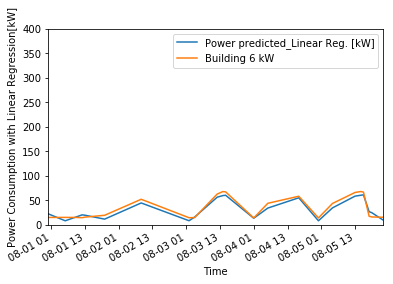

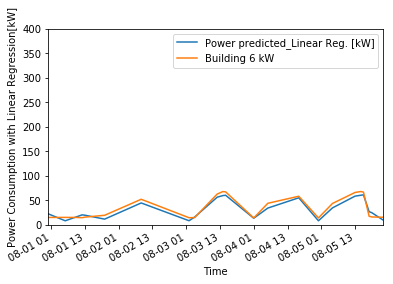

In [15]:
from sklearn import linear_model #usage of Linear Regression for building prediction model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(X_train,Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
Y_test.index
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split,index=Y_test.index,columns=["Power predicted_Linear Reg. [kW]"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split['2010-08-01':'2010-08-05'].plot()
plt.xlabel('Time')
plt.ylabel("Power Consumption with Linear Regression[kW]")
plt.ylim([0,400])
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error_linearReg_split=mean_absolute_error(Y_test,predict_DF_linearReg_split["Power predicted_Linear Reg. [kW]"])
print "Mean absolute error using  Linear Regression is :"+str(mean_absolute_error_linearReg_split)
mean_squared_error_linearReg_split=mean_squared_error(Y_test,predict_DF_linearReg_split["Power predicted_Linear Reg. [kW]"])
print "Mean squared error using  Linear Regression is :"+str(mean_squared_error_linearReg_split)
r2_error=r2_score(Y_test,predict_DF_linearReg_split["Power predicted_Linear Reg. [kW]"])
print "R2 error using  Linear Regression is :"+str(r2_error)
coeff_variation = np.sqrt(mean_squared_error_linearReg_split)/Y_test.mean()
print "Coefficient variation using  Linear Regression is :"+str(coeff_variation)

Mean absolute error using  Linear Regression is :4.65442017112
Mean squared error using  Linear Regression is :38.6195043711
R2 error using  Linear Regression is :0.830825977346
Coefficient variation using  Linear Regression is :0.228478051601


In [17]:
from sklearn.model_selection import cross_val_predict #Usage of Cross Validation
predict_linearReg_CV=cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_DF_linearReg_split_CV=pd.DataFrame(predict_linearReg_CV,index=DF_target.index,columns=["Power cons Predict_linearReg_CV"])
predict_DF_linearReg_split_CV=predict_DF_linearReg_split_CV.join(DF_target)
predict_DF_linearReg_split_CV_ChosenDates=predict_DF_linearReg_split_CV["2010-08-01":"2010-08-05"]
R2_score_linearReg_CV = r2_score(predict_DF_linearReg_split_CV["Building 6 kW"],predict_DF_linearReg_split_CV["Power cons Predict_linearReg_CV"])
print "R2 error using Linear Regression is :"+str(R2_score_linearReg_CV)
mean_absolute_error_linearReg_CV = mean_absolute_error(predict_DF_linearReg_split_CV["Building 6 kW"],predict_DF_linearReg_split_CV["Power cons Predict_linearReg_CV"])
print "Mean absolute error using Cross Validation  is :"+str(mean_absolute_error_linearReg_CV)
mean_squared_error_linearReg_CV = mean_squared_error(predict_DF_linearReg_split_CV["Building 6 kW"],predict_DF_linearReg_split_CV["Power cons Predict_linearReg_CV"])
print "Mean squared error using Cross Validation is :"+str(mean_squared_error_linearReg_CV)
coeff_variation_linearReg_CV = np.sqrt(mean_squared_error_linearReg_CV)/predict_DF_linearReg_split_CV["Building 6 kW"].mean()
print "Coefficient variation using  Linear Regression is :"+str(coeff_variation_linearReg_CV)

R2 error using Linear Regression is :0.823210332141
Mean absolute error using Cross Validation  is :4.85569138675
Mean squared error using Cross Validation is :40.8170706673
Coefficient variation using  Linear Regression is :0.236645800163


In [ ]:
from sklearn.ensemble import RandomForestRegressor #Usage of Random Forest Regression
reg_RF=RandomForestRegressor()
predict_RF_CV=cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predict_DF_RF_CV=pd.DataFrame(predict_RF_CV,index=DF_target.index,columns=["Power cons.Predict_Forest_Regressor"])
predict_DF_RF_CV=predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_ChosenDates=predict_DF_RF_CV["2010-08-01":"2010-08-05"]

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error_RF_CV=mean_absolute_error(DF_target,predict_RF_CV)
print "Mean absolute error using RF Regressor  is :"+str(mean_absolute_error_RF_CV)
mean_squared_error_RF_CF=mean_squared_error(DF_target,predict_RF_CV)
print "Mean squared error using RF Regressor is :"+str(mean_squared_error_RF_CF)
r2_error_RF_CF=r2_score(DF_target,predict_RF_CV)
print "R2 error using  RF Regressor is :"+str(r2_error_RF_CF)

Mean absolute error using RF Regressor  is :2.53157289623
Mean squared error using RF Regressor is :18.7314810276
R2 error using  RF Regressor is :0.918868937549
